In [4]:
import tflearn
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,fully_connected,dropout
from tflearn.layers.estimator import regression
import matplotlib.pyplot as plt

In [5]:
digits = pd.read_csv('/home/rajjjj/Downloads/mnist_train.csv')
digits_test = pd.read_csv('/home/rajjjj/Downloads/mnist_test.csv')

In [6]:
#labels
ytrain1 = digits['label']
#features
xtrain = digits.drop(['label'],axis=1)

In [7]:
xtrain = xtrain.values
ytrain1 = ytrain1.values

In [8]:
#labels
ytest1 = digits_test['label']
ytest1 = ytest1.values
#features
xtest = digits_test.drop(['label'],axis=1)
xtest = xtest.values

In [9]:
ytest = []
ytrain = []
for i in range(len(ytest1)):
    if(ytest1[i]==0):
        ytest.append([1,0,0,0,0,0,0,0,0,0])
    elif(ytest1[i]==1):
        ytest.append([0,1,0,0,0,0,0,0,0,0])
    elif(ytest1[i]==2):
        ytest.append([0,0,1,0,0,0,0,0,0,0])
    elif(ytest1[i]==3):
        ytest.append([0,0,0,1,0,0,0,0,0,0])
    elif(ytest1[i]==4):
        ytest.append([0,0,0,0,1,0,0,0,0,0])
    elif(ytest1[i]==5):
        ytest.append([0,0,0,0,0,1,0,0,0,0])
    elif(ytest1[i]==6):
        ytest.append([0,0,0,0,0,0,1,0,0,0])
    elif(ytest1[i]==7):
        ytest.append([0,0,0,0,0,0,0,1,0,0])
    elif(ytest1[i]==8):
        ytest.append([0,0,0,0,0,0,0,0,1,0])
    elif(ytest1[i]==9):
        ytest.append([0,0,0,0,0,0,0,0,0,1])

for i in range(len(ytrain1)):
    if(ytrain1[i]==0):
        ytrain.append([1,0,0,0,0,0,0,0,0,0])
    elif(ytrain1[i]==1):
        ytrain.append([0,1,0,0,0,0,0,0,0,0])
    elif(ytrain1[i]==2):
        ytrain.append([0,0,1,0,0,0,0,0,0,0])
    elif(ytrain1[i]==3):
        ytrain.append([0,0,0,1,0,0,0,0,0,0])
    elif(ytrain1[i]==4):
        ytrain.append([0,0,0,0,1,0,0,0,0,0])
    elif(ytrain1[i]==5):
        ytrain.append([0,0,0,0,0,1,0,0,0,0])
    elif(ytrain1[i]==6):
        ytrain.append([0,0,0,0,0,0,1,0,0,0])
    elif(ytrain1[i]==7):
        ytrain.append([0,0,0,0,0,0,0,1,0,0])
    elif(ytrain1[i]==8):
        ytrain.append([0,0,0,0,0,0,0,0,1,0])
    elif(ytrain1[i]==9):
        ytrain.append([0,0,0,0,0,0,0,0,0,1])

In [10]:
ytest = np.array(ytest)
ytrain = np.array(ytrain)

In [11]:
xtest = xtest.reshape(-1,28,28,1)
# xtrain = xtrain.reshape(-1,28,28,1)
# ytest = ytest.reshape(-1,1)
# ytrain = ytrain.reshape(-1,1)
# ytrain.shape

In [12]:
#input layer
cnet=input_data(shape=[None,28,28,1],name='input')

#1st layer
cnet=conv_2d(cnet,26,3,regularizer='L1')

cnet=max_pool_2d(cnet,3)

#2nd layer
cnet=conv_2d(cnet,24,3,regularizer='L1')

cnet=max_pool_2d(cnet,3)

#3rd layer
cnet=conv_2d(cnet,22,3,regularizer='L1')

cnet=max_pool_2d(cnet,3)
#4th layer


cnet=conv_2d(cnet,20,3,regularizer='L1')

cnet=max_pool_2d(cnet,3)

#fully
cnet=fully_connected(cnet,324)
#dropout
cnet=dropout(cnet,keep_prob=0.6)
# output
cnet=fully_connected(cnet,10,activation='softmax')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
cnet=regression(cnet,optimizer='adam',loss='categorical_crossentropy',name='output',learning_rate=0.0003)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
cnmodel = tflearn.DNN(cnet)

Instructions for updating:
Use tf.cast instead.


In [15]:
cnmodel.load('digits.tf1')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/rajjjj/digits.tf1


In [139]:
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
# img = load_img('image.jpg')
f = cv2.imread('image.png',0)
f = cv2.resize(f,(28,28))

In [140]:
from skimage import color
from skimage import io

# f = color.rgb2gray(io.imread('image.jpg',0))
for i in range(len(f)):
    for j in range(len(f[i])):
        f[i][j] = abs(255-f[i][j])


(28, 28)

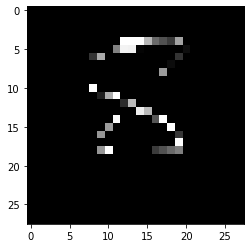

In [141]:
plt.imshow(f,cmap='gray')
f.shape

# plt.imshow(xtest[0].reshape(28,28))

In [142]:
# f = cv2.resize(f,(28,28))
f.shape

(28, 28)

In [143]:
x=f.reshape(1,28,28,1)

In [144]:
np.argmax(cnmodel.predict(x))
# xtest[104]
#(xtest[104].reshape(1,28,28,1))

6

In [131]:
xtrain.shape

(60000, 784)

In [132]:
import tkinter as tk
import PIL
from PIL import Image, ImageDraw
class ImageGenerator:
    def __init__(self,parent,posx,posy,*kwargs):
        self.parent = parent
        self.posx = posx
        self.posy = posy
        self.sizex = 200
        self.sizey = 200
        self.b1 = "up"
        self.xold = None
        self.yold = None 
        #self.lbl3=Label(self, text='Result')
        self.drawing_area=tk.Canvas(self.parent,width=self.sizex,height=self.sizey)
        self.drawing_area.place(x=self.posx,y=self.posy)
        self.drawing_area.bind("<Motion>", self.motion)
        self.drawing_area.bind("<ButtonPress-1>", self.b1down)
        self.drawing_area.bind("<ButtonRelease-1>", self.b1up)
        self.button=tk.Button(self.parent,text="SAVE",width=5,bg='white',command=self.save)
        self.button.place(x=self.sizex/7,y=self.sizey+20)
        self.button=tk.Button(self.parent,text="Recognize",width=5,bg='white')
        self.button.place(x=(self.sizex/7)+200,y=self.sizey+20)
        self.button1=tk.Button(self.parent,text="CLEAR",width=5,bg='white',command=self.clear)
        self.button1.place(x=(self.sizex/7)+80,y=self.sizey+20)

        self.image=Image.new("RGB",(200,200),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)

    def save(self):
        filename = "image.jpg"
        self.image.save(filename)

    def clear(self):
        self.drawing_area.delete("all")
        self.image=Image.new("RGB",(200,200),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)

    def b1down(self,event):
        self.b1 = "down"

    def b1up(self,event):
        self.b1 = "up"
        self.xold = None
        self.yold = None

    def motion(self,event):
        if self.b1 == "down":
            if self.xold is not None and self.yold is not None:
                event.widget.create_line(self.xold,self.yold,event.x,event.y,smooth='true',width=8,fill='black')
                self.draw.line(((self.xold,self.yold),(event.x,event.y)),(0,0,0),width=8)

        self.xold = event.x
        self.yold = event.y

if __name__ == "__main__":
    root=tk.Tk()
    root.wm_geometry("%dx%d+%d+%d" % (400, 400, 10, 10))
    root.config(bg='white')
    ImageGenerator(root,10,10)
    root.mainloop()

In [135]:
import streamlit as st
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename(master=root)
fname = st.text_input(file_path)
if fname != "":
    st.write("Reading text file...", fname)